In [ ]:
#data preprocessing
import pandas as pd
from google.colab.patches import cv2_imshow
#math operations
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Extract training data into a dataframe for further manipulation
train = pd.read_csv('/content/drive/My Drive/Data Gempa/train.csv', nrows=700000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
train.head(10)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691
5,8,1.4691
6,9,1.4691
7,7,1.4691
8,-5,1.4691
9,3,1.4691


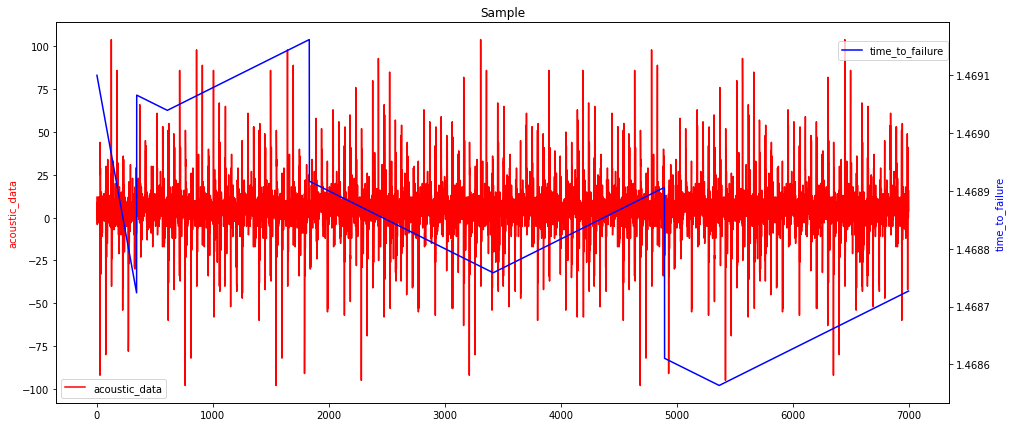

In [ ]:
train_acoustic_data_small = train['acoustic_data'].values[::100]
train_time_to_failure_small = train['time_to_failure'].values[::100]
fig, ax1 = plt.subplots(figsize=(16, 7))
plt.title("Sample")
plt.plot(train_acoustic_data_small, color='r')
ax1.set_ylabel('acoustic_data', color='r')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='b')
ax2.set_ylabel('time_to_failure', color='b')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)


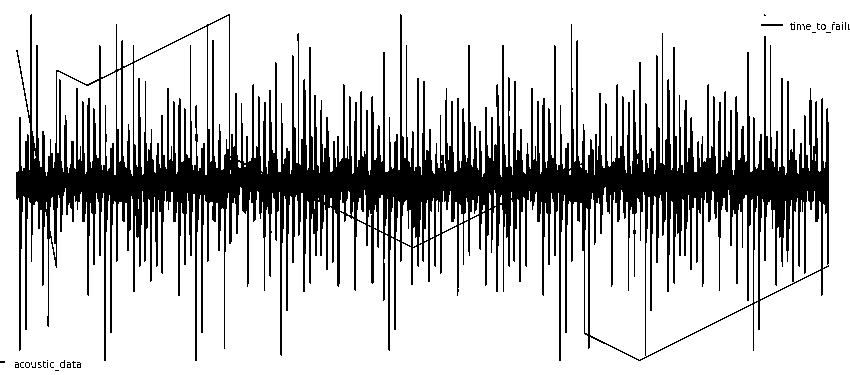

In [ ]:
source = "/content/drive/My Drive/Data Gempa/seismo.png"
# membaca citra dari sumber
nimg = cv2.imread(source, cv2.IMREAD_UNCHANGED)
y=25
x=80
h=375
w=850
img = nimg[y:y+h, x:x+w]
# proses konversi citra ke citra biner
thresh = 127
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binaryImg = cv2.threshold(grayImg, thresh, 255, cv2.THRESH_BINARY)[1]
# menampilkan citra asli dan citra hasil

cv2_imshow(binaryImg)
# untuk menampilkan window hingga key ditekan
cv2.waitKey(0)
cv2.destroyAllWindows()

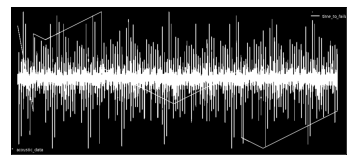

In [ ]:
th3 = cv2.adaptiveThreshold(binaryImg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
ret,thresh2 = cv2.threshold(binaryImg,127,255,cv2.THRESH_BINARY_INV)

images = [binaryImg, thresh2]
plt.subplot(1,1,1),plt.imshow(images[1],'gray')
plt.xticks([]),plt.yticks([])
plt.show()

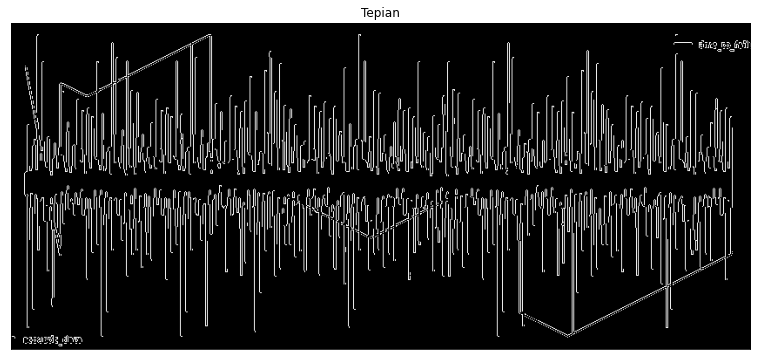

In [ ]:
edges = cv2.Canny(binaryImg,100,200)
plt.figure(figsize = (15,6))
plt.imshow(edges,cmap = 'gray')
plt.title('Tepian'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#prediksi dengan menggunakan algoritma movingaverage
train['prediksi']=train.iloc[:,0].rolling(window=3).mean()
train['prediksi']=train['prediksi'].replace(np.nan,0)
print(train)

        acoustic_data  time_to_failure   prediksi
0                  12         1.469100   0.000000
1                   6         1.469100   0.000000
2                   8         1.469100   8.666667
3                   5         1.469100   6.333333
4                   8         1.469100   7.000000
...               ...              ...        ...
699995              9         1.468727  13.333333
699996              6         1.468727   9.666667
699997              7         1.468727   7.333333
699998              6         1.468727   6.333333
699999              8         1.468727   7.000000

[700000 rows x 3 columns]


In [ ]:
from sklearn.metrics import mean_squared_error
y_true = train['acoustic_data']
y_pred =train['prediksi']
mse=mean_squared_error(y_pred,y_true)
rmse=np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  28.965015873015858
RMSE:  5.381915632283347


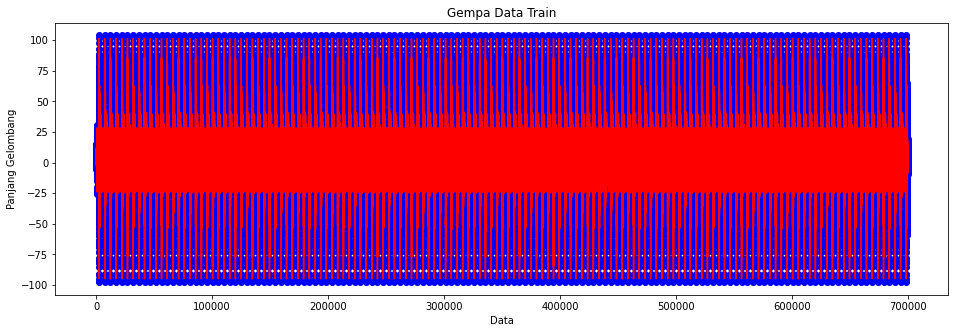

In [ ]:
a=range(len(train))
plt.figure(figsize = (16,5))
plt.scatter(a,train['acoustic_data'],color='blue')
plt.plot(a,train['prediksi'],color='red')
plt.title('Gempa Data Train')
plt.xlabel('Data')
plt.ylabel('Panjang Gelombang')
plt.show()

**Didapatkan hasil seperti berikut**<br><br>
Data berwarna biru adalah data aktual. sedangkan data berwarna merah adalah hasil prediksi dari program. <br>
Didapatkan prediksi gelombang stabil beradi di area **0-25** yang kemungkinan besar tidak terjadi gempa. karena tidak ada lonjakan gelombang. artinya pergerakan tanah cukup stabil dalam data gambar gelombang tersebut.
